<a href="https://colab.research.google.com/github/IgorNascAlves/scrapping_forum/blob/main/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports e carregando dados

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
url = "https://raw.githubusercontent.com/IgorNascAlves/scrapping_forum/main/subcategoria_topicos_sem_resposta.csv"

In [41]:
df = pd.read_csv(url)
df.head()

,URL,Nome,Quantidade
0,https://cursos.alura.com.br/forum/subcategoria...,Multiplataforma,22
1,https://cursos.alura.com.br/forum/subcategoria...,Flutter,2
2,https://cursos.alura.com.br/forum/subcategoria...,Android,7
3,https://cursos.alura.com.br/forum/subcategoria...,iOS,9
4,https://cursos.alura.com.br/forum/subcategoria...,Jogos,3


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         112 non-null    object
 1   Nome        112 non-null    object
 2   Quantidade  112 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


#Explorando

Quantidade de subcategorias

In [43]:
df.shape

(112, 3)

In [44]:
qtd_subcategorias = len(df.Nome.unique())
qtd_subcategorias

112

In [45]:
df.Quantidade.value_counts()

16     8
2      6
0      5
12     5
9      5
1      4
33     4
36     4
11     4
22     3
15     3
19     3
8      3
5      3
4      3
29     2
14     2
10     2
20     2
3      2
24     2
25     2
28     2
26     2
89     2
34     2
180    2
30     1
43     1
100    1
95     1
84     1
82     1
6      1
7      1
69     1
60     1
49     1
13     1
27     1
41     1
40     1
38     1
17     1
18     1
147    1
37     1
21     1
32     1
159    1
112    1
125    1
Name: Quantidade, dtype: int64

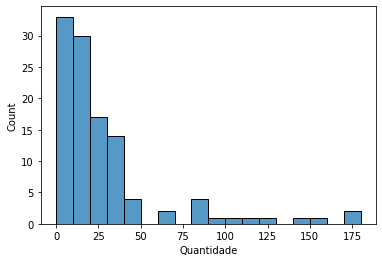

In [46]:
sns.histplot(x='Quantidade', data=df)

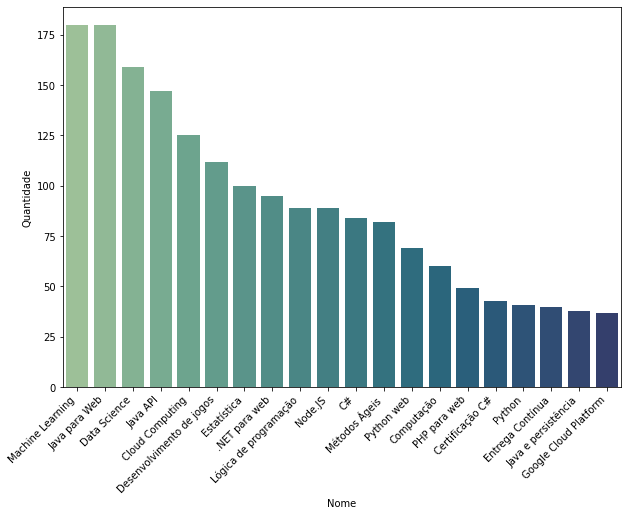

In [47]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Quantidade", data=df.sort_values("Quantidade", ascending=False).head(20), palette='crest')
_ = plt.xticks(rotation=45, ha='right') 

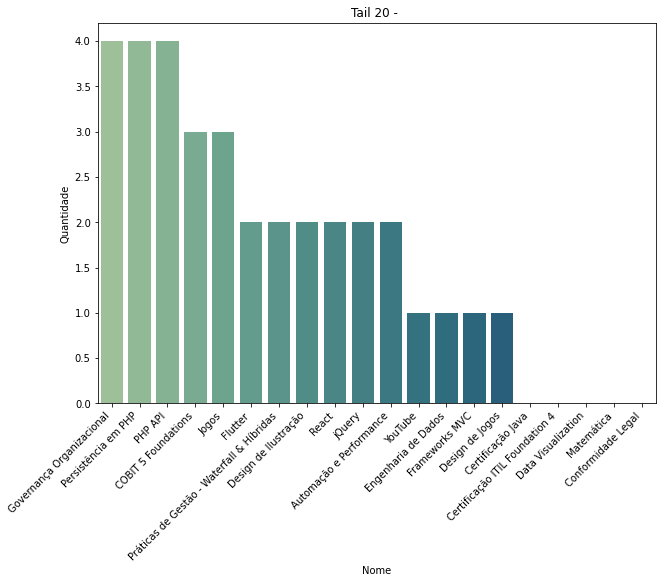

In [48]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Quantidade", data=df.sort_values("Quantidade", ascending=False).tail(20), palette='crest')
ax.set_title('Tail 20 - ')
_ = plt.xticks(rotation=45, ha='right') 

Quantidade de subcategorias com mais de uma pagina

In [49]:
df.query('Quantidade > 20')['Quantidade'].count()

47

In [50]:
df["Mais_uma_pag"] = [True if row > 20 else False for row in df['Quantidade']]

In [51]:
df.value_counts("Mais_uma_pag")

Mais_uma_pag
False    65
True     47
dtype: int64

In [52]:
df.value_counts("Mais_uma_pag", normalize=True)*100

Mais_uma_pag
False    58.035714
True     41.964286
dtype: float64

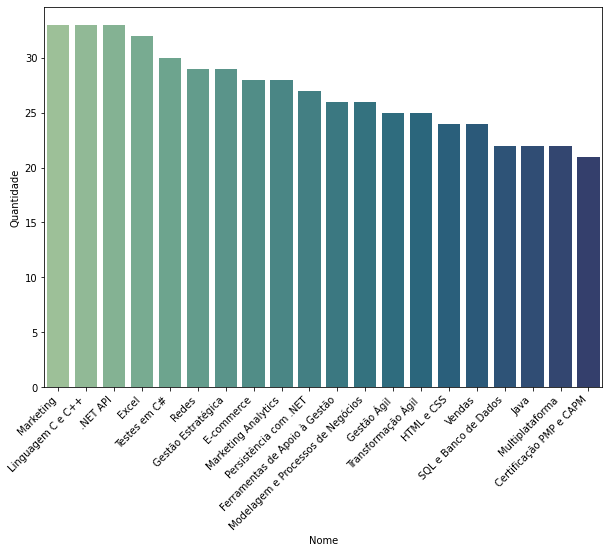

In [53]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Quantidade", data=df.query("Mais_uma_pag == True").sort_values("Quantidade", ascending=False).tail(20), palette='crest')
_ = plt.xticks(rotation=45, ha='right') 

In [58]:
df.sort_values("Quantidade", ascending=False).head(20)[["Nome", "Quantidade"]]

,Nome,Quantidade
75,Machine Learning,180
9,Java para Web,180
73,Data Science,159
12,Java API,147
52,Cloud Computing,125
32,Desenvolvimento de jogos,112
80,Estatística,100
18,.NET para web,95
5,Lógica de programação,89
7,Node.JS,89


Quantidade de pagina

In [65]:
df["Qtd_pag"] = [int(row/20) for row in df['Quantidade']]

In [66]:
df.sort_values("Quantidade", ascending=False).head(20)[["Nome", "Quantidade", "Qtd_pag"]]

,Nome,Quantidade,Qtd_pag
75,Machine Learning,180,9
9,Java para Web,180,9
73,Data Science,159,7
12,Java API,147,7
52,Cloud Computing,125,6
32,Desenvolvimento de jogos,112,5
80,Estatística,100,5
18,.NET para web,95,4
5,Lógica de programação,89,4
7,Node.JS,89,4


#Sub Categorias com mais de duas paginas

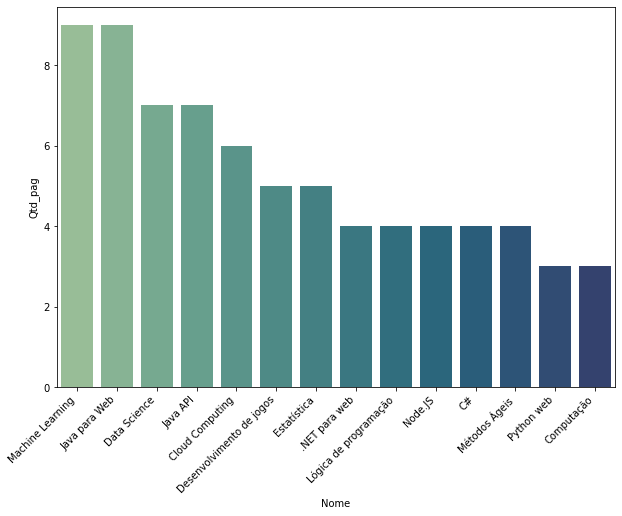

In [69]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Qtd_pag", data=df.sort_values("Quantidade", ascending=False).head(14), palette='crest')
_ = plt.xticks(rotation=45, ha='right') 